# Melanoma Detection Assignment 

---

**Problem statement:**

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.


**The data set contains the following diseases:**

- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion

---
## Importing Skin Cancer Data
### To do: Take necessary actions to read the data
### Importing all the important libraries



In [ ]:
# importing libraries for data visualization, model building and training

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation,MaxPooling2D
from glob import glob

**Supress Warnings**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Importing dataset to Google Drive**

In [ ]:
# mounting the google drive
## If you are using the data by mounting the google drive, use the following :

from google.colab import drive

drive.mount('/content/drive', force_remount=True)
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/drive


---

# Data Reading & Understanding
---

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset

data_dir_train = pathlib.Path("/content/drive/My Drive/CNN_dataset/CNN1/Train")
data_dir_test = pathlib.Path('/content/drive/My Drive/CNN_dataset/CNN1/Test')

In [ ]:
# counting the total train and test images, dataset has total 2357 images

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2249
118


---

## Dataset creation
---

**Load using keras.preprocessing**

- Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset
Define some parameters for the loader:

In [ ]:
# defining parameters for the loader

batch_size = 32
img_height = 180
img_width = 180

- We will use 80% of the images for training, and 20% for validation.

In [ ]:
# creating a training dataset with seed=123

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2249 files belonging to 9 classes.
Using 1800 files for training.


In [ ]:
# creating a validation dataset with seed=123

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2249 files belonging to 9 classes.
Using 449 files for validation.


In [ ]:
# listing out all the classes of skin cancer and storing them in a list. 

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


---

## Data Visualisation
Todo, create a code to visualize one instance of all the nine classes present in the dataset
---

- Visualizing one instance of all the nine classes present in the dataset

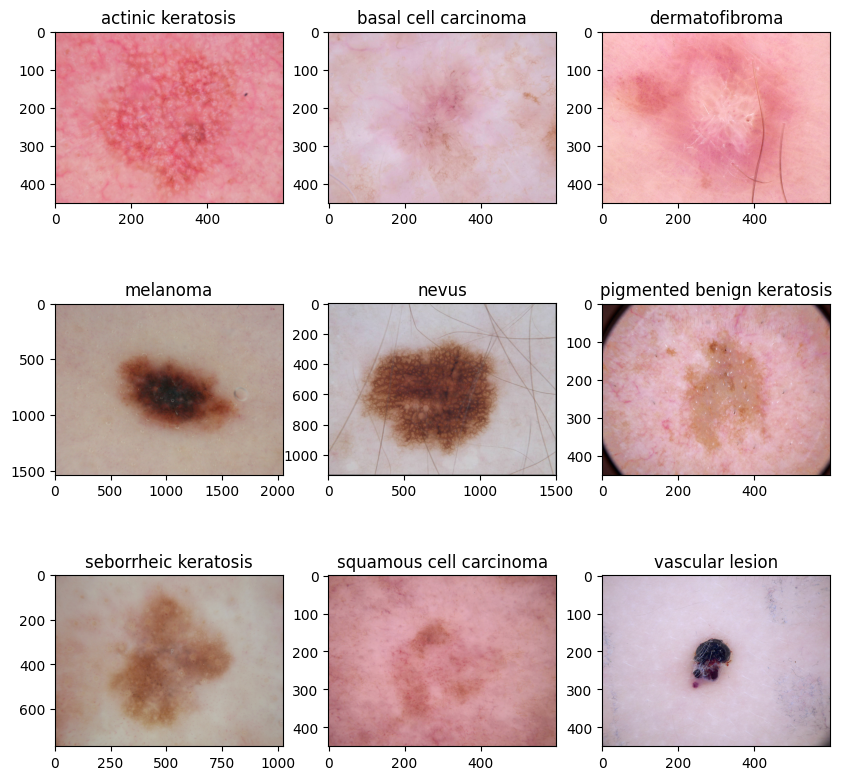

In [ ]:
# Visualizing the image from training/validation dataset from each class

plt.figure(figsize=(10,10))

for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = mpimg.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

---

# Model Building & Training
---

### Model 1 - without augmented data
---

**Creating a CNN model, which can accurately detect 9 classes present in the dataset.**

- Using ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). 


**Creating the model 1**

In [ ]:
# creating a CNN model 1 with softmax activation function & drop out layers
# Model building - Rescaling -> Conv2D -> MaxPooling2D -> Conv2D -> MaxPooling2D -> Conv2D -> MaxPooling2D -> Dropout -> Dense -> Dense


num_classes = 9

cnn_model1 = Sequential([
    layers.experimental.preprocessing.Rescaling(1. / 255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.20),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
    ])

**Compiling the model**

As it is a multi class classification, we are using the SparseCategoricalCrossEntropy as the loss function, and adam optimizer as a hit & trial.

In [ ]:
# choosing an optimiser and loss function

cnn_model1.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
# getting the summary of all layers

cnn_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

**Training the model**

In [ ]:
# fitting the model for epochs value as '20'

epochs=20
history = cnn_model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 679s 2s/step - loss: 2.0133 - accuracy: 0.2489 - val_loss: 1.8858 - val_accuracy: 0.2851
Epoch 2/20
57/57 [==============================] - 1s 26ms/step - loss: 1.8025 - accuracy: 0.3539 - val_loss: 1.7341 - val_accuracy: 0.3452
Epoch 3/20
57/57 [==============================] - 2s 27ms/step - loss: 1.5568 - accuracy: 0.4650 - val_loss: 1.4983 - val_accuracy: 0.4655
Epoch 4/20
57/57 [==============================] - 2s 28ms/step - loss: 1.3612 - accuracy: 0.5350 - val_loss: 1.4077 - val_accuracy: 0.4944
Epoch 5/20
57/57 [==============================] - 1s 26ms/step - loss: 1.2642 - accuracy: 0.5606 - val_loss: 1.3889 - val_accuracy: 0.5056
Epoch 6/20
57/57 [==============================] - 1s 26ms/step - loss: 1.1958 - accuracy: 0.5750 - val_loss: 1.3493 - val_accuracy: 0.5212
Epoch 7/20
57/57 [==============================] - 1s 26ms/step - loss: 1.1104 - accuracy: 0.6011 - val_loss: 1.4073 - val_accuracy: 0.4989
Epoch 8/20
57

**Visualizing training results**

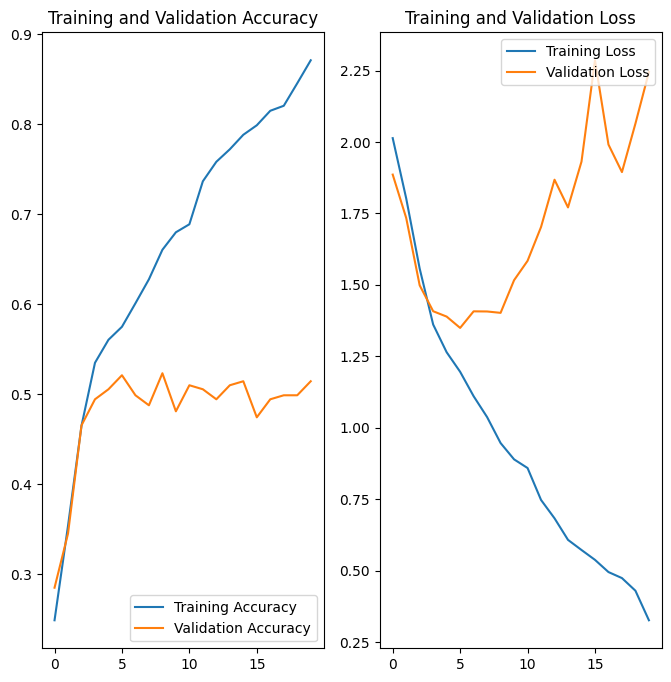

In [ ]:
# plotting the accuracy for training & validation

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observations:

- During last epochs, we can detect a huge difference in loss functions between training and validation.
-Initially the training accuracy and validation accuracy increaces together without any gap but at the middle validation accuracy becom saturated and training accuracy alone increses.
- We can see that the model is overfitting.
- It can be reduced by having a deeper model & adding a data augmentation layer before it.


---

## Data augmentation
---

### Model 2 - with augmented data
---

In [ ]:
# performing data augumentation for model 2

data_augmentation = keras.Sequential( [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ])

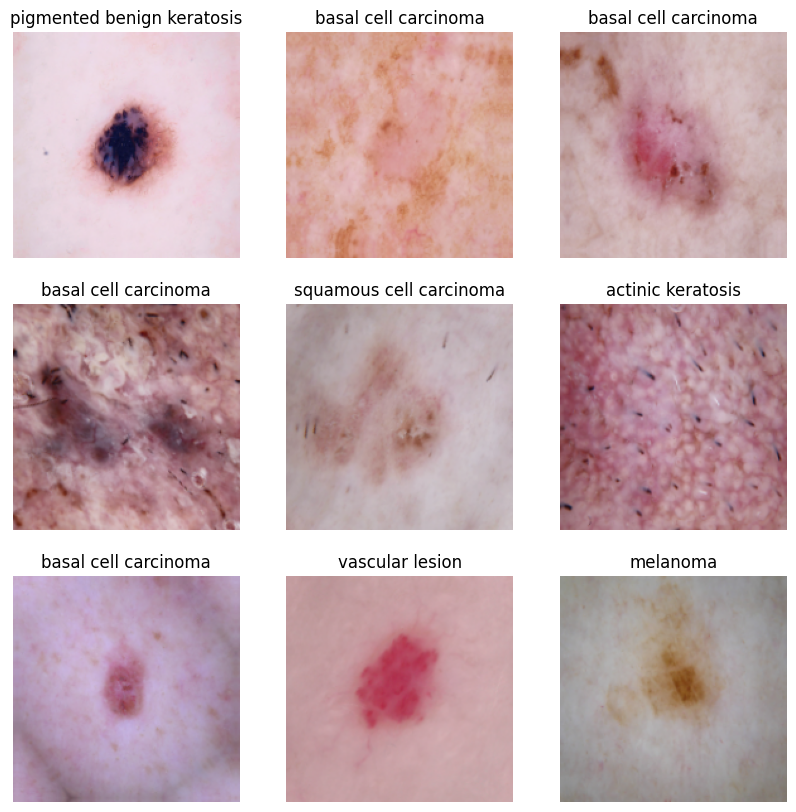

In [ ]:
# Visualizing the augmentation strategy with one instance of training image

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augmentation(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

**Creating the model 2**


In [ ]:
# creating a CNN model 2 with data augmentation and drop out layers
# Model building - Data augmentation -> Rescaling -> Conv2D -> MaxPooling2D -> Conv2D -> MaxPooling2D -> Conv2D -> MaxPooling2D -> Dropout -> Dense -> Dense

num_classes = 9

cnn_model2 = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1. / 255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.20),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
    ])

**Compiling the model**

In [ ]:
# choosing an optimiser and loss function

cnn_model2.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

**Training the model**

In [ ]:
# fitting the model for epochs value as '20'

epochs=20
history = cnn_model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 4s 31ms/step - loss: 2.0288 - accuracy: 0.2489 - val_loss: 1.9388 - val_accuracy: 0.2940
Epoch 2/20
57/57 [==============================] - 2s 30ms/step - loss: 1.7264 - accuracy: 0.3850 - val_loss: 1.5960 - val_accuracy: 0.4120
Epoch 3/20
57/57 [==============================] - 2s 29ms/step - loss: 1.5350 - accuracy: 0.4606 - val_loss: 1.4747 - val_accuracy: 0.4722
Epoch 4/20
57/57 [==============================] - 1s 26ms/step - loss: 1.4409 - accuracy: 0.5017 - val_loss: 1.4439 - val_accuracy: 0.4766
Epoch 5/20
57/57 [==============================] - 2s 27ms/step - loss: 1.4285 - accuracy: 0.5017 - val_loss: 1.4069 - val_accuracy: 0.4833
Epoch 6/20
57/57 [==============================] - 2s 27ms/step - loss: 1.3623 - accuracy: 0.5222 - val_loss: 1.4095 - val_accuracy: 0.4855
Epoch 7/20
57/57 [==============================] - 2s 26ms/step - loss: 1.3492 - accuracy: 0.5372 - val_loss: 1.3961 - val_accuracy: 0.5011
Epoch 8/20
57

**Visualizing the results**

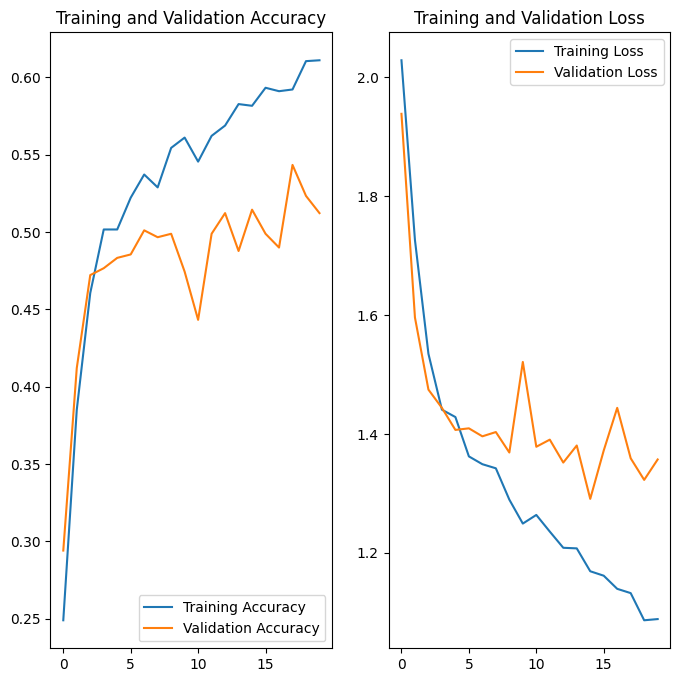

In [ ]:
# plotting the accuracy for training & validation

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observations:

- We can see that the model is not overfitting after implementing data augmentation.
- There is no much improvement with respect to accuracy from the base model.

---
# Class distribution
---

### Finding the distribution of classes in the training dataset.
---

Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. 

Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## creating a list with class name and no of samples

class_size = {}

for name in class_names:
    class_size[name] = len(list(data_dir_train.glob(name+'/*.jpg')))

class_size

{'actinic keratosis': 114,
 'basal cell carcinoma': 386,
 'dermatofibroma': 95,
 'melanoma': 438,
 'nevus': 357,
 'pigmented benign keratosis': 462,
 'seborrheic keratosis': 77,
 'squamous cell carcinoma': 181,
 'vascular lesion': 139}

In [ ]:
## creating a dataframe with class name and no of samples

df_class = pd.DataFrame(class_size.items(), columns = ['Class Name', 'Number of Samples'])

df_class

,Class Name,Number of Samples
0,actinic keratosis,114
1,basal cell carcinoma,386
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


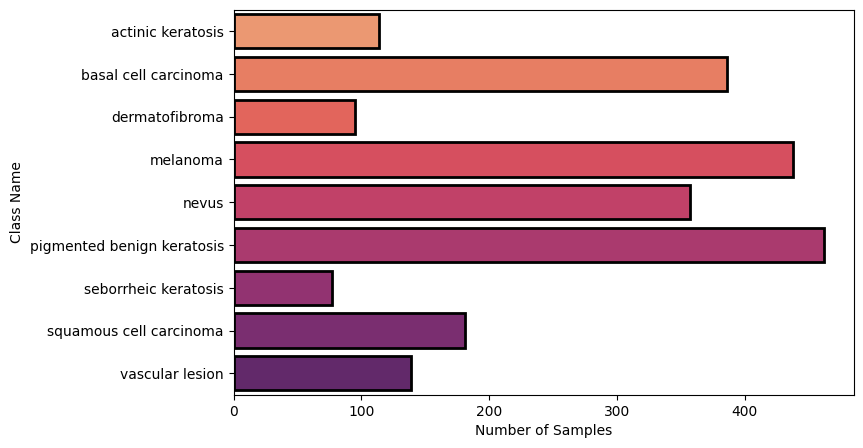

In [ ]:
# plotting dataframe for showing class imbalance

plt.figure(figsize=[8,5])
sns.barplot(x='Number of Samples',y='Class Name', data=df_class,saturation=1,edgecolor=(0,0,0),linewidth=2,palette='flare')
plt.show()

#### Observations:

- 'seborrheic keratosis' class has a least number of samples.
- 'pigmented benign keratosis' class dominates the data in terms proportionate number of samples.

---
# Handling class imbalances
---

### Rectifing the class imbalance
---

We are using a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
# executing Augmentor to generate 500 samples per class

path_to_training_dataset='/content/drive/My Drive/CNN_dataset/CNN1/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/drive/My Drive/CNN_dataset/CNN1/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBF481B12A0>: 100%|██████████| 500/500 [00:22<00:00, 21.91 Samples/s]


Initialised with 386 image(s) found.
Output directory set to /content/drive/My Drive/CNN_dataset/CNN1/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBF481B39A0>: 100%|██████████| 500/500 [00:20<00:00, 24.93 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/My Drive/CNN_dataset/CNN1/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FBF3021AC50>: 100%|██████████| 500/500 [00:22<00:00, 22.55 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/My Drive/CNN_dataset/CNN1/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FBF30363E20>: 100%|██████████| 500/500 [02:07<00:00,  3.91 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/My Drive/CNN_dataset/CNN1/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FBF30361A80>: 100%|██████████| 500/500 [01:30<00:00,  5.55 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/My Drive/CNN_dataset/CNN1/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBF4B2626B0>: 100%|██████████| 500/500 [00:23<00:00, 21.29 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/My Drive/CNN_dataset/CNN1/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FBF4B176B00>: 100%|██████████| 500/500 [00:46<00:00, 10.72 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/My Drive/CNN_dataset/CNN1/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FBF30221FF0>: 100%|██████████| 500/500 [00:21<00:00, 23.31 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/My Drive/CNN_dataset/CNN1/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBF4B43D1E0>: 100%|██████████| 500/500 [00:21<00:00, 23.52 Samples/s]


In [ ]:
# getting the count of new samples i.e. 500 * 9 = 4500

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


**Lets see the distribution of augmented data after adding new images to the original training data.**

In [ ]:
# creating a dataframe with class and no. of samples added

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [ ]:
# getting the count of new samples in each class

df2['Label'].value_counts()

pigmented benign keratosis    500
melanoma                      500
dermatofibroma                500
nevus                         500
seborrheic keratosis          500
basal cell carcinoma          500
actinic keratosis             500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

Now we have added 500 images to all the classes to maintain some class balance. 

### Model 3 - on the rectified class imbalance data with data augmentation
---

We are also including data augmentation for handling underfitting/overfitting with class imbalance.

In [ ]:
# defining parameters for the loader

batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# creating a training dataset with seed=123

data_dir_train='/content/drive/My Drive/CNN_dataset/CNN1/Train'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6749 files belonging to 9 classes.
Using 5400 files for training.


In [ ]:
# creating a validation dataset with seed=123

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6749 files belonging to 9 classes.
Using 1349 files for validation.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# performing data augumentation for model 3

data_augmentation = keras.Sequential( [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ])

**Creating the model 3**

In [ ]:
# creating a CNN model 3 with data augmentation and drop out layers
# Model building - Data augmentation -> Rescaling -> Conv2D -> MaxPooling2D -> Conv2D -> MaxPooling2D -> Conv2D -> MaxPooling2D -> Dropout -> Dense -> Dense

num_classes = 9
cnn_model3 = Sequential ([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.20),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
    ])

**Compiling the model**

In [ ]:
# choosing an optimiser and loss function

cnn_model3.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
# Getting the summary of all layers

cnn_model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

**Training the model**

In [ ]:
# fitting the model for epochs value as '50'

epochs = 50
history = cnn_model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 41s 76ms/step - loss: 1.8200 - accuracy: 0.3098 - val_loss: 1.5191 - val_accuracy: 0.4418
Epoch 2/50
169/169 [==============================] - 5s 29ms/step - loss: 1.5040 - accuracy: 0.4141 - val_loss: 1.4400 - val_accuracy: 0.4411
Epoch 3/50
169/169 [==============================] - 5s 31ms/step - loss: 1.4284 - accuracy: 0.4519 - val_loss: 1.3704 - val_accuracy: 0.4863
Epoch 4/50
169/169 [==============================] - 5s 28ms/step - loss: 1.3643 - accuracy: 0.4665 - val_loss: 1.4140 - val_accuracy: 0.4744
Epoch 5/50
169/169 [==============================] - 5s 29ms/step - loss: 1.3259 - accuracy: 0.4954 - val_loss: 1.2514 - val_accuracy: 0.5174
Epoch 6/50
169/169 [==============================] - 5s 27ms/step - loss: 1.2331 - accuracy: 0.5276 - val_loss: 1.1901 - val_accuracy: 0.5434
Epoch 7/50
169/169 [==============================] - 5s 28ms/step - loss: 1.1817 - accuracy: 0.5524 - val_loss: 1.0835 - val_accuracy: 0.582

**Visualizing the model results**

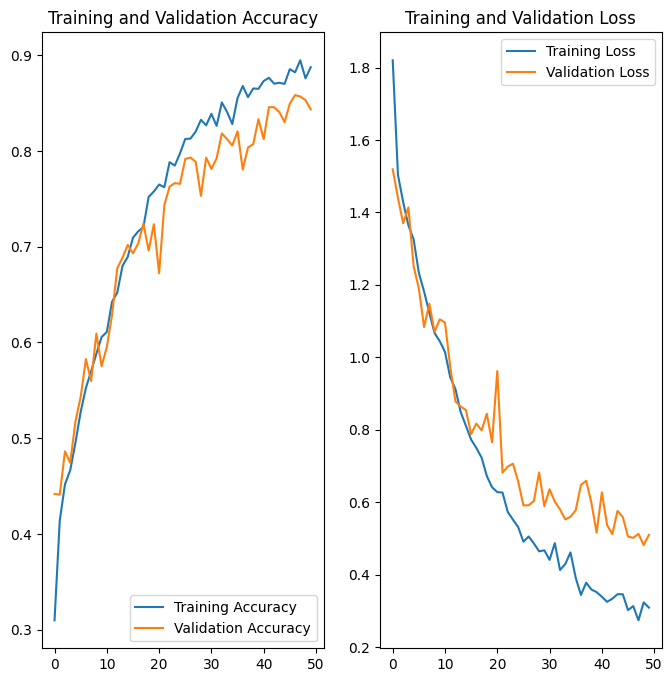

In [ ]:
# plotting the accuracy for training & validation

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observations:

- Model looks fine now with an accurracy of training data approx 88% and validation accuracy of 84%. It can be improved further by having a deeper model & hyperparameter optimization with a change in the optimizer.
- Class rebalancing helped us in getting better accuracy.
- We can see that the model is not overfitting now.